##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
#%pip install pandas 
#%pip install matplotlib
#%pip install scikit-learn
#%pip install joblib
#%pip install numpy
#%pip install tensorflow
#%pip install xgboost
#%pip install seaborn
#%pip install statsmodels
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [1]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

# 1 Loading data

A model needs data to be trained for predictions. But there are steps needed to ensure that the data is cleaned and ready for a model - if the data is wrongly formatted or missing, the model will not work as intended.

The steps below will help you get started should you be new to the concept.

## 1.1 Preparing Data

In [2]:
# import pandas package
import pandas as pd 

In [3]:
# read in the data
df2 = pd.read_csv("./data/catA_train.csv")

In [4]:
# get information about our dataframe
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [5]:
# find the number of rows and columns in our dataset
print(df2.shape)

# find the names of columns in our dataset
print(df2.columns)

(29182, 28)
Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company', 'Is Domestic Ultimate',
       'Is Global Ultimate'],
      dtype='object')


In [6]:
# check for the number of missing values in the dataframe
df2.isna().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [7]:
# show count, mean, std, and quintile information for each numerical column
df2.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [8]:
# a look at the first few rows of our data
df2.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


## 1.2 Processing Data


#### Drop NaN Values
- We choose to drop rows without latitude and longitude coordinates as they only form a very small part of our dataset.

In [9]:
# removes rows without either lat or long coordinates
df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE"])

#### One-Hot Encoding
We will also handle categorical variables by performing one-hot encoding on all columns with important categories as values. This is done by using the pd.get_dummies function.

An alternative approach using the LabelEncoder from scikit-learn is also demonstrated.

- Be cautious about the Curse of Dimensionality!

In [10]:
# Remove rows where the Company Status is 'Inactive'
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']

In [11]:
# to ensure important info isnt being lost
df2['Import/Export Status_Missing'] = df2['Import/Export Status'].isna()

df3 = df2.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])

df3 = pd.get_dummies(df2, columns=['Entity Type'], prefix='Entity_Type')
df3 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership_Type')
df3 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import_Export_Status')
df3 = df2.drop(columns=[col for col in ["Company Status (Active/Inactive)", "Entity Type", 'Import/Export Status', 'Ownership Type'] if col in df2.columns], errors='ignore') # are all Active

In [12]:
# Check the number of null values
df3.isna().sum()

LATITUDE                                   0
LONGITUDE                                  0
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               430
Parent Company                           510
Parent Country                           516
Company Description                        0
Square Footage                         29062
Employees (Single Site)                12357
Employees (Domestic Ultimate Total)       78
Employees (Global Ultimate Total)       2766
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Fiscal Year End                        22356
Global Ultimate Company                  510
Global Ultimate Country                  519
Domestic Ultimate Company               1033
Is Domesti

In [13]:
# Find the frequency of each industry
sic_code_frequency = df3['SIC Code'].value_counts()

# Set a threshold for low-frequency SIC Codes
threshold = 7  # Adjust this threshold based on your preference

# Identify SIC Codes with frequency below the threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

# Replace these low-frequency SIC Codes with a common label "Others"
df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df3['SIC Code'].value_counts()

# Display the updated DataFrame
print(sic_code_frequency1)

6719.0    7743
8742.0    1387
Others     883
7371.0     774
4731.0     734
          ... 
781.0        7
2035.0       7
7313.0       7
3442.0       7
5441.0       7
Name: SIC Code, Length: 330, dtype: int64


In [14]:
# convert to str cus we dont want it to be trained as a numeric value
# Convert the entire column to a common data type (string in this case)
df3['SIC Code'] = df3['SIC Code'].astype(str)

The alternative approach to encoding is indicated below to deal with SIC Codes.

For more information on SIC Codes, visit the site here: https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Use label encoding for 'SIC Code'
label_encoder = LabelEncoder()
df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])

In [17]:
df3["SIC Code"].unique()
df3

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Parent Company,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,262,Employment Agencies,73610000.0,Employment agencies,2020.0,FRANK RECRUITMENT GROUP PRIVATE LTD.,...,NaN,2.209224e+06,4.637871e+06,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,True
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,108,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,FORTITUDE SHIPPING PTE. LTD.,...,100.0,7.093536e+09,7.093536e+09,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,True
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,241,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,MADISON LIGHTERS AND WATCHES CO LTD,...,4.0,1.026308e+06,1.026308e+06,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,True
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,241,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,WILMAR INTERNATIONAL LIMITED,...,100.0,7.339898e+10,7.339898e+10,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,True
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,241,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,ASIA GREEN CAPITAL PTE. LTD.,...,4.0,4.322130e+05,4.322130e+05,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,241,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,SENDA INTERNATIONAL CAPITAL LIMITED,...,6615.0,2.949122e+06,2.943975e+09,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0,True
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,241,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",NaN,NaN,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,0.0,0.0,True
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,243,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,ABRDN HOLDINGS LIMITED,...,NaN,2.289731e+08,4.114318e+08,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0,False
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,241,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,ENCYCLIA 1 INVESTMENTS PTE. LTD.,...,4.0,1.026308e+06,1.026308e+06,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0,True


# 2 EDA

We will now proceed to analyze and visualize a subset of our data to gain some rough insight into how inputs in our data are related to our outputs.

## 2.1 Plotting Graphs

### Correlation Matrix

We will first use a Correlation Matrix to observe how a variable in the dataset are affected by other variables.

In [18]:
# use of a correlation matrix to observe how variables in our dataset may be affected by others
numerical_df = df3.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Assuming correlation_matrix is your correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Print or use the correlation DataFrame as needed
correlation_df

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.048014,-0.090848,-0.086741,-0.023920,NaN,0.001218,0.004256,-0.010028,0.004602,-0.010685,-0.004247,-0.039308
LONGITUDE,-0.048014,1.000000,0.019071,0.027591,-0.008341,NaN,-0.006147,0.013906,0.003871,-0.006884,0.008687,0.001314,0.009406
SIC Code,-0.090848,0.019071,1.000000,0.855014,0.146938,NaN,-0.037077,-0.012975,-0.000513,-0.014151,-0.023470,0.011546,0.090281
8-Digit SIC Code,-0.086741,0.027591,0.855014,1.000000,0.195899,NaN,-0.051843,-0.022186,0.001599,-0.011617,-0.014653,0.016634,0.087467
Year Found,-0.023920,-0.008341,0.146938,0.195899,1.000000,NaN,-0.060604,-0.046587,-0.026246,0.014576,-0.022241,0.076406,0.112065
Square Footage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employees (Single Site),0.001218,-0.006147,-0.037077,-0.051843,-0.060604,NaN,1.000000,0.138964,0.008485,0.003552,0.001486,-0.016532,0.004826
Employees (Domestic Ultimate Total),0.004256,0.013906,-0.012975,-0.022186,-0.046587,NaN,0.138964,1.000000,0.020450,0.016899,0.024313,-0.060773,-0.044315
Employees (Global Ultimate Total),-0.010028,0.003871,-0.000513,0.001599,-0.026246,NaN,0.008485,0.020450,1.000000,-0.003975,0.664014,0.076335,-0.087309
Sales (Domestic Ultimate Total USD),0.004602,-0.006884,-0.014151,-0.011617,0.014576,NaN,0.003552,0.016899,-0.003975,1.000000,0.098417,-0.054627,-0.039397


### Geospatial Analysis

This can be done either with Matplotlib (Plot latitude against longitude) or Folium (to visualize each pair of coordinates on a map of Singapore).

We will create a copy of our previously created dataframe and subset a small portion of it to perform the analysis on.

In [19]:
# import required libraries
import matplotlib.pyplot as plt

# we will need this for the color gradient representing how high the domestic sales figure is.
from matplotlib.colors import LogNorm
import seaborn as sns

In [20]:
# for the upcoming geospatial analysis portion, we will use a small subset of the data provided for plotting.
filtered_df = df2[df2['SIC Code'].isin([5099, 1611, 8711, 4789])]

filtered_df.head(2)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
30,1.264843,103.818291,LAKB2BID1337916,STATKRAFT HOLDING CHILE PTE. LTD.,8711.0,Engineering Services,87110000.0,Engineering services,2003.0,Subsidiary,...,9830186.0,7.412580e+09,NaN,NaN,Statkraft Sf,Norway,STATKRAFT HOLDING SINGAPORE PTE. LTD.,0.0,0.0,True
48,1.309792,103.865024,LAKB2BID9109451,ZALL INTERNATIONAL COMMERCE (SINGAPORE) PTE. LTD.,5099.0,"Durable Goods, Not Elsewhere Classified",50990000.0,"Durable goods, nec",2020.0,Subsidiary,...,147815.0,1.478150e+05,NaN,2021-12-31T05:00:00Z,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,Singapore,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,0.0,0.0,True


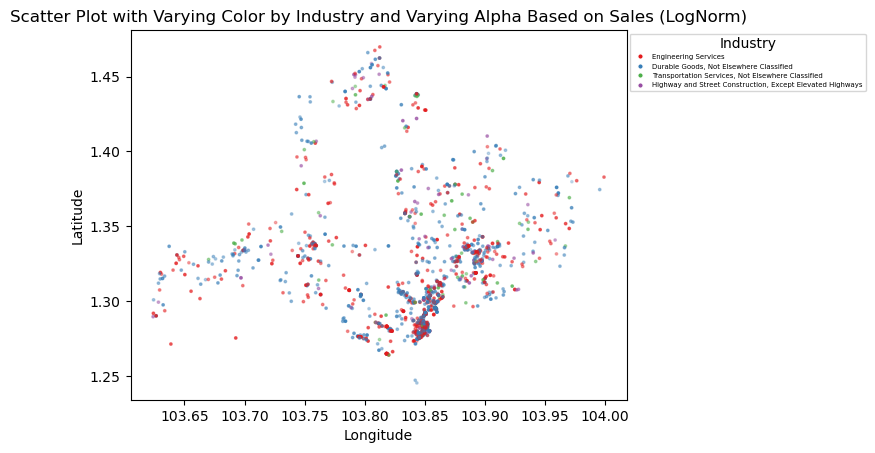

In [21]:
# read in the filtered dataset and do EDA. confusion matrix, etc
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a constant color (e.g., blue)
constant_color = 'blue'

# Define a color palette based on unique industries
industry_palette = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))

# Create a dictionary to map Industry to a unique color
industry_colors = dict(zip(filtered_df['Industry'].unique(), industry_palette))

# Scatter plot with varying color by Industry and varying alpha based on Sales values
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(industry_colors), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))

# Add a legend for Industry
legend_labels = filtered_df['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                              markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]
plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

# Show the plot
plt.show()

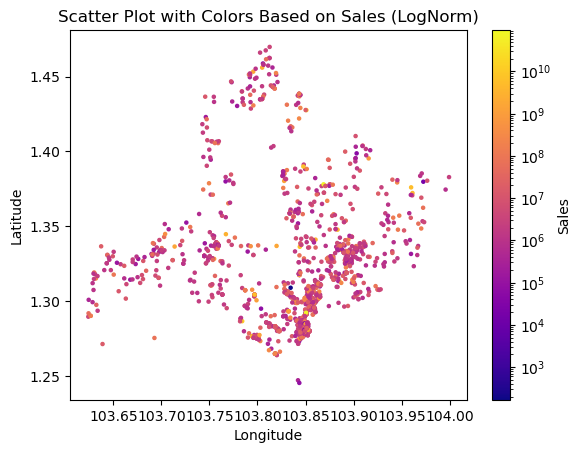

In [22]:
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a colormap transitioning from blue to red
cmap = 'plasma'

# Scatter plot with colors based on Sales values and LogNorm
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')

# Show the plot
plt.show()

## 2.2 Feature Selection
We will remove features that are of the following:
- seemingly irrelevant to affecting the output by domain knowledge;
- Low/Zero-variance Factors.

We will also filter our dataset to select only the rows of data we are interested in.

In [23]:
# Specify columns to drop
columns_to_drop = ["error", "Fiscal Year End", "Global Ultimate Company", "Domestic Ultimate Company", "Web Address", "Square Footage", "Company Description", "PostCode", "8-Digit SIC Code", "8-Digit SIC Description", "AccountID",
                   "Parent Company", "City", "Country", "Address", "Address1", "Industry", "Region", "Parent Country", "Global Ultimate Country", "Company"]

# Drop columns if they exist in the DataFrame
df4 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns], errors='ignore')

In [24]:
df4 = df4.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])
df4

,LATITUDE,LONGITUDE,SIC Code,Year Found,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
1,1.291294,103.827476,108,2015.0,39.0,100.0,100.0,7.093536e+09,7.093536e+09,0.0,0.0,True
2,1.300144,103.857517,241,1993.0,4.0,4.0,4.0,1.026308e+06,1.026308e+06,1.0,0.0,True
3,1.300785,103.791263,241,2006.0,10.0,100.0,100.0,7.339898e+10,7.339898e+10,0.0,0.0,True
5,1.444773,103.812740,329,1986.0,300.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,True
7,1.282887,103.850849,241,2010.0,10.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
29171,1.274915,103.799145,241,2020.0,10.0,80.0,80.0,1.307680e+07,1.307680e+07,0.0,0.0,True
29175,1.292221,103.850613,276,2009.0,25.0,10.0,10.0,4.404600e+05,4.404600e+05,0.0,0.0,True
29176,1.277753,103.848429,14,1996.0,100.0,100.0,4556.0,6.344614e+06,1.402050e+09,1.0,0.0,False
29180,1.295595,103.858968,241,2018.0,10.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,True


/var/folders/5f/3xndn1qj5z51h3x_j_lp5x940000gn/T/ipykernel_19600/1262980371.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering_filtered['Cluster'] = kmeans_filtered.fit_predict(data_for_clustering_imputed)


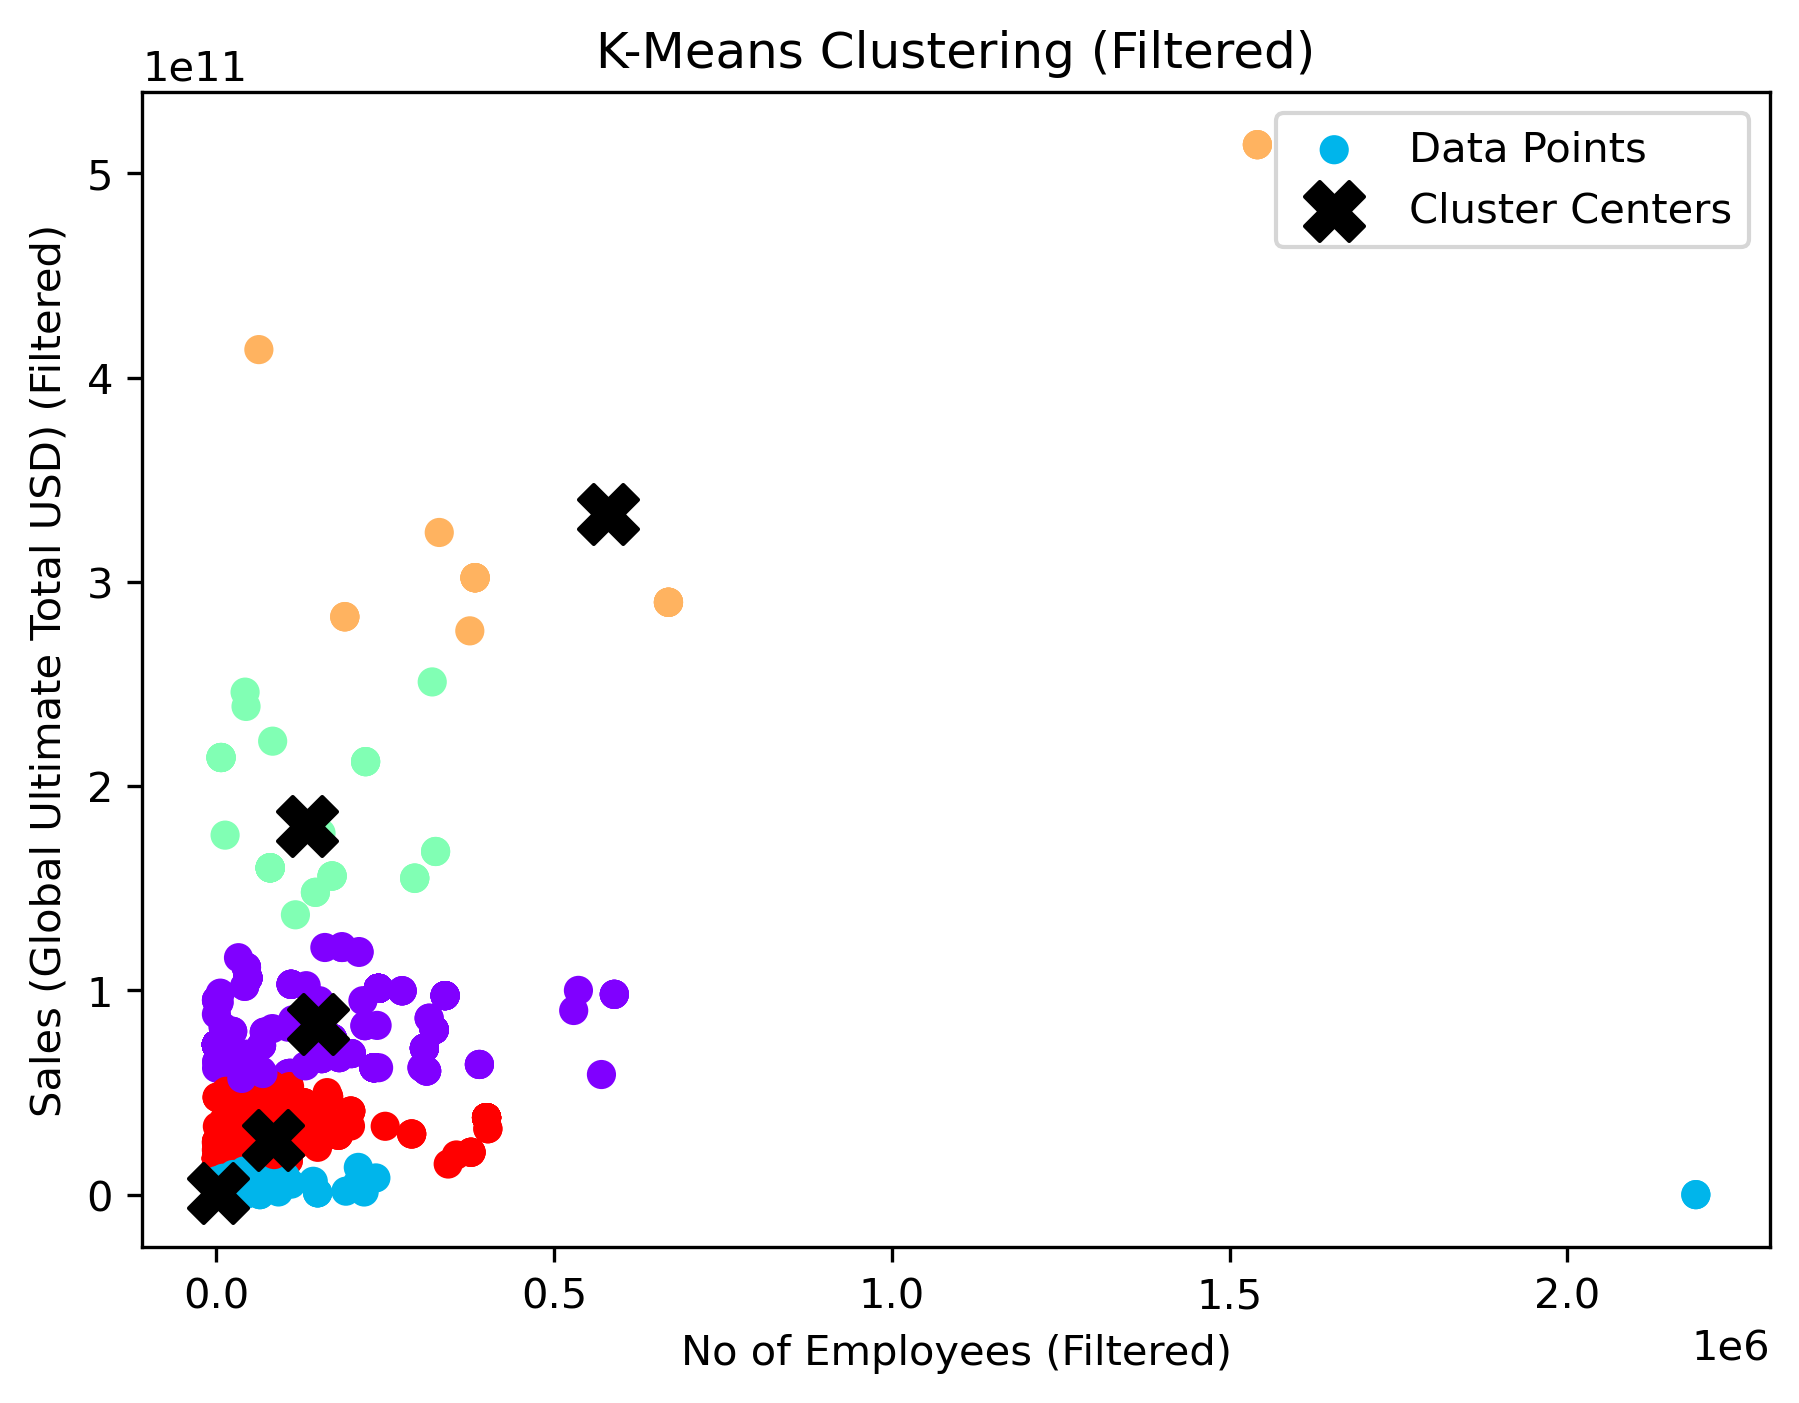

In [25]:
#clustering analysis

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Create a DataFrame with filtered 'Employees' and 'Sales'
data_for_clustering_filtered = df4[['Employees (Global Ultimate Total)', 'Sales (Global Ultimate Total USD)']]

# Impute missing values (replace NaN with mean, you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = pd.DataFrame(imputer.fit_transform(data_for_clustering_filtered), columns=data_for_clustering_filtered.columns)

# Use KMeans to perform clustering with, for example, 3 clusters
kmeans_filtered = KMeans(n_clusters= 5, random_state=42)
data_for_clustering_filtered['Cluster'] = kmeans_filtered.fit_predict(data_for_clustering_imputed)

# Get cluster centers
cluster_centers_filtered = kmeans_filtered.cluster_centers_

# Plot the data points and cluster centers
plt.figure(7, figsize=[7, 5], dpi=300)
plt.scatter(data_for_clustering_filtered['Employees (Global Ultimate Total)'], data_for_clustering_filtered['Sales (Global Ultimate Total USD)'], c=data_for_clustering_filtered['Cluster'], cmap='rainbow', label='Data Points')
plt.scatter(cluster_centers_filtered[:, 0], cluster_centers_filtered[:, 1], c='black', marker='X', label='Cluster Centers', s=200)
plt.xlabel('No of Employees (Filtered)')
plt.ylabel('Sales (Global Ultimate Total USD) (Filtered)')
plt.title('K-Means Clustering (Filtered)')
plt.legend()
plt.show()


Pattern Recognition:

Clustering helps in identifying patterns or groups of similar data points within a dataset. This is useful for discovering inherent structures that might not be immediately apparent. In the diagram, we can see clustering effect, particularly in the lower ranges of both employee count and sales. This suggests that the average number of employees is distinctly highlighted in the graph, showcasing a concentration of data points with fewer individuals and lower sales figures.

### Data Type Conversion

We will need to convert some columns into datatypes that are suitable for analysis. This makes sure that the values in these fields make sense.

In [27]:
# Convert 'Is Domestic Ultimate' to True/False
df4['Is Domestic Ultimate'] = df4['Is Domestic Ultimate'] == 1
df4['Is Global Ultimate'] = df4['Is Global Ultimate'] == 1

In [28]:
df4.columns

Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Year Found',
       'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Import/Export Status_Missing'],
      dtype='object')

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

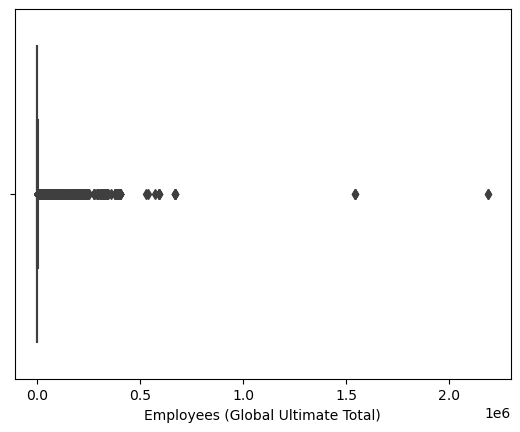

In [30]:
#boxplot
sns.boxplot(x=df4['Employees (Global Ultimate Total)'])  # Replace 'feature' with your column name
plt.show()
Q1 = df4['Employees (Global Ultimate Total)'].quantile(0.25)
Q3 = df4['Employees (Global Ultimate Total)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df5 = df4[(df4['Employees (Global Ultimate Total)'] >= lower_bound) & (df4['Employees (Global Ultimate Total)'] <= upper_bound)]


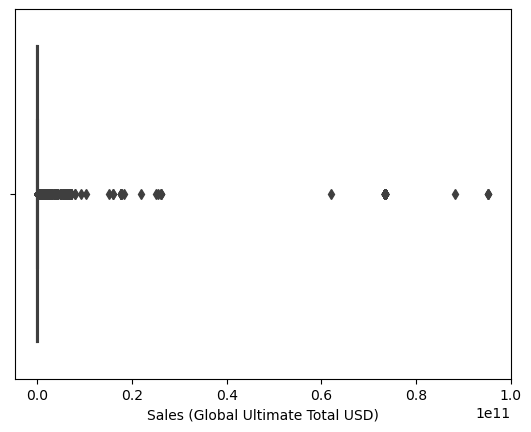

In [31]:
sns.boxplot(x=df5['Sales (Global Ultimate Total USD)'])  # Replace 'feature' with your column name
plt.show()
Q1 = df5['Sales (Global Ultimate Total USD)'].quantile(0.25)
Q3 = df5['Sales (Global Ultimate Total USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df6 = df5[(df5['Sales (Global Ultimate Total USD)'] >= lower_bound) & (df5['Sales (Global Ultimate Total USD)'] <= upper_bound)]


# 3 Model Training and Evaluation

## 3.1 Selecting a Model


After experiencing with several models, we decided to use the Gradient Boosting Regressor provisioned by scikit-learn.

## Linear Regression
According to the correlation matrix, the correlation between "Employees (Global Ultimate Total)" and "Sales (Global Ultimate Total USD)" is 0.664014, which suggests that as the number of global employees increases, global sales in USD tend to increase as well. The rest of the variables all have an absolute correlation value of less than 0.1, which suggests a weak correlation with the target "Sales (Global Ultimate Total USD)". Therefore, we choose to regress "Sales (Global Ultimate Total USD)" on "Employees (Global Ultimate Total)".

In [32]:
X = df6[['Employees (Global Ultimate Total)']]  # feature columns
y = df6['Sales (Global Ultimate Total USD)']  # target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# test prediction
new_data = np.array([[100]])
prediction = model.predict(new_data)
print("Prediction:", prediction)

Mean Squared Error: 62712599262724.26
R-squared: 0.344662988875285
Prediction: [10862123.06193946]


/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


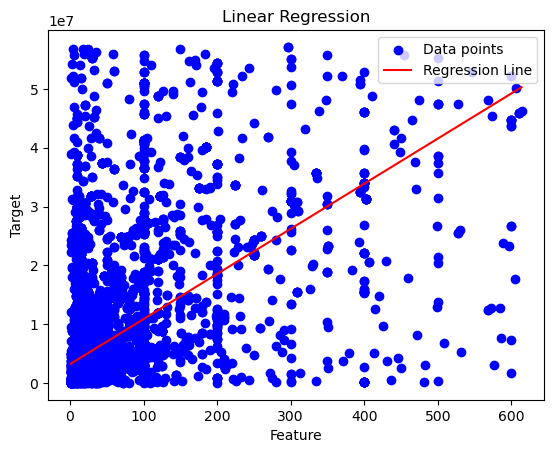

In [34]:
# Plotting the actual data points
plt.scatter(X, y, color='blue', label='Data points')

# Generating predictions for the regression line
line_X = np.linspace(X.min(), X.max(), 100)  # 100 points for a smooth line
line_y = model.predict(line_X.reshape(-1, 1))

# Plotting the regression line
plt.plot(line_X, line_y, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')

# Showing the legend
plt.legend()

# Display the plot
plt.show()


In [35]:
coefficients = model.coef_
print("Coefficients:", coefficients)
import statsmodels.api as sm
X = sm.add_constant(X)  # Adds a constant column to input features
model = sm.OLS(y, X).fit()
print(model.summary())


Coefficients: [76713.57869262]
                                    OLS Regression Results                                   
Dep. Variable:     Sales (Global Ultimate Total USD)   R-squared:                       0.317
Model:                                           OLS   Adj. R-squared:                  0.317
Method:                                Least Squares   F-statistic:                     4323.
Date:                               Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                                       22:58:05   Log-Likelihood:            -1.6193e+05
No. Observations:                               9334   AIC:                         3.239e+05
Df Residuals:                                   9332   BIC:                         3.239e+05
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                             

We obtained an R-squared of 0.344663, which means that the model can explain 34.47% of the variation in the data, and a mean-squared error of 6.27*10^13.
the coefficient of "Employees (Global Ultimate Total)" is 7.67*10^14, with t-values of 65.751 and a p-value smaller than 0.001; hence it is statistically significant. It means that on average, having one employee is correlated with an increase of 7.67*10^14 USD in global ultimate total sales.
The intercept has a value of 3.157*10^6, with t-values of 33.284 and a p-value smaller than 0.001; hence it is statistically significant. This means that on average, a company without any employee is correlated with global ultimate total sales of 3.157*10^6 USD.

## Model 2: GradientBoostingRegressor

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# Separate features and target variable
X = df4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df4['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

### Cross-Validation

We will also perform a K-fold Cross Validation. This helps us mitigate the risk of overfitting on a specific set of data, by being able to split the data into K number of folds, test on 1 fold and train for the rest for K number of times.

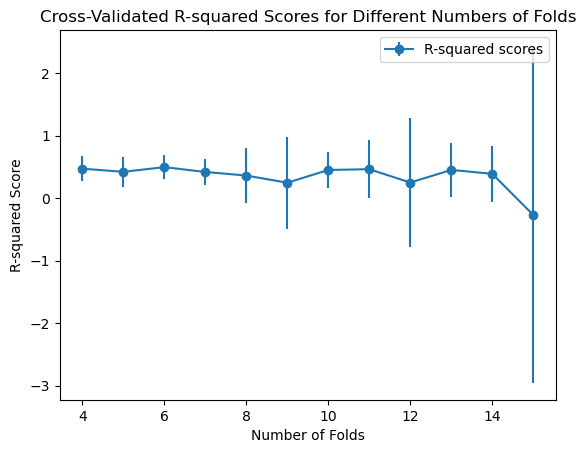

In [38]:
# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

## 3.2 Model Evalutation Metrics

There are many ways to evaluate a Machine Learning model:

- Residual Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Average Percentage Error (MAPE) for Regression Tasks;
- Confusion Matrix, AUC-ROC Curve for Classification Problems;
- and other variants of such metrics.

In this problem, MSE will be very big as the sales are very large by nature. We will opt to use the R-Squared Score (used to score how well a regression model fits its data).

In [39]:
# Use k-fold cross-validation with 10 folds
model_10 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [ 0.48872235  0.57950098  0.04274453 -0.08803291  0.7620186   0.13287073
  0.58822987  0.78365606  0.53049823  0.67672174]
Mean R-squared score: 0.44969301871140105
Standard Deviation of R-squared scores: 0.2932317467134092
Test R-squared score: 0.4152758660050424


minimal submission -- can go steps further to improve the model, ie creating artificial features, feature engineering, clustering etc.

# Saving and testing the model

We will export our model into a Hierarchical Data Format 5 File (.h5) for use by others. A general use case will also be covered in the form of a function below.

In [40]:
import joblib

# Save the base model to an HDF5 file
joblib.dump(model_10, 'base_model.h5')

['base_model.h5']

In [41]:
def test_model(data):
    # we assume the data is cleaned
    # To load the model in the future
    loaded_model = joblib.load('./base_model.h5')
    predictions = loaded_model.predict(data)

    return predictions

# Extract the last row of the test set
last_row = X_test.iloc[[1]]

# Make predictions on the last row
print(test_model(last_row))

[-1.21847197e+08]


## Model 3: Tensor-flow
TensorFlow supports distributed computing, making it scalable for large datasets and computations. Training neural networks on large datasets can be computationally intensive, and TensorFlow can efficiently handle the parallel processing required for training deep learning models.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Assuming df4 is your DataFrame
# Separate features and target variable
X = df4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df4['Sales (Domestic Ultimate Total USD)']

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model on the current fold
        model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

        # Evaluate the model on the validation set and calculate R-squared
        val_predictions = model.predict(X_val_fold)
        r2_score = 1 - (np.sum((y_val_fold - val_predictions.squeeze())**2) / np.sum((y_val_fold - np.mean(y_val_fold))**2))
        cv_scores.append(r2_score)

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(np.mean(cv_scores))
    std_r2_scores.append(np.std(cv_scores))

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

# Use k-fold cross-validation with 10 folds
model_10 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model_10.compile(optimizer='adam', loss='mean_squared_error')
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the current fold
    model_10.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the validation set and calculate R-squared
    val_predictions = model_10.predict(X_val_fold)
    r2_score = 1 - (np.sum((y_val_fold - val_predictions.squeeze())**2) / np.sum((y_val_fold - np.mean(y_val_fold))**2))
    cv_scores.append(r2_score)

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", np.mean(cv_scores))
print("Standard Deviation of R-squared scores:", np.std(cv_scores))

# Train the model on the entire training set
model_10.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the test set
test_predictions = model_10.predict(X_test)
test_r2_score = 1 - (np.sum((y_test - test_predictions.squeeze())**2) / np.sum((y_test - np.mean(y_test))**2))
print("Test R-squared score:", test_r2_score)

ModuleNotFoundError: No module named 'tensorflow'

## Model 4: XGBoost
XGBoost is designed to handle large datasets efficiently. It implements parallelization and utilizes a column block structure, which speeds up the training process, making it well-suited our datasets with a large number of entries.

XGBoost incorporates L1 (LASSO) and L2 (ridge) regularization techniques to prevent overfitting. These regularization terms help in controlling the complexity of the model, improving its generalization to new data.

XGBoost is also an implementation of gradient boosting, which is an ensemble learning technique. It builds a series of weak learners (trees) sequentially, with each tree correcting the errors of the previous ones. This results in a powerful predictive model that can capture complex relationships in the data.

In [ ]:
#XGBoost

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [ ]:
# Separate features and target variable
X = df4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df4['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
model = XGBRegressor(random_state=42)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds (XGBoost)')
plt.legend()
plt.show()

In [ ]:
# Use k-fold cross-validation with 10 folds
model_10 = XGBRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

In [ ]:
# Use k-fold cross-validation with 10 folds
model_10 = XGBRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Replace with the actual model class you used
import joblib
from sklearn.preprocessing import LabelEncoder

def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

    The function accepts a dataframe as input and returns an iterable (list)
    of binary classes as output.

    The function should be coded to test on hidden data
    and should include any preprocessing functions needed for your model to perform.

    All relevant code MUST be included in this function.
    '''

    # Load the trained model
    model = joblib.load('./base_model.joblib')

    # Assume that you have a preprocessing function
    def preprocess_data(data):
        df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE"])
        df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']
        # to ensure important info isnt being lost
        df2['Import/Export Status_Missing'] = df2['Import/Export Status'].isna()

        df3 = df2.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])

        df3 = pd.get_dummies(df2, columns=['Entity Type'], prefix='Entity_Type')
        df3 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership_Type')
        df3 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import_Export_Status')
        df3 = df2.drop(columns=[col for col in ["Company Status (Active/Inactive)", "Entity Type", 'Import/Export Status', 'Ownership Type'] if col in df2.columns], errors='ignore') # are all Active

        # Find the frequency of each industry
        sic_code_frequency = df3['SIC Code'].value_counts()

        # Set a threshold for low-frequency SIC Codes
        threshold = 7  # Adjust this threshold based on your preference

        # Identify SIC Codes with frequency below the threshold
        low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

        # Replace these low-frequency SIC Codes with a common label "Others"
        df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

        sic_code_frequency1 = df3['SIC Code'].value_counts()
        df3['SIC Code'] = df3['SIC Code'].astype(str)
        # Use label encoding for 'SIC Code'
        label_encoder = LabelEncoder()
        df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])
        # Specify columns to drop
        columns_to_drop = ["error", "Fiscal Year End", "Global Ultimate Company", "Domestic Ultimate Company", "Web Address", "Square Footage", "Company Description", "PostCode", "8-Digit SIC Code", "8-Digit SIC Description", "AccountID",
                   "Parent Company", "City", "Country", "Address", "Address1", "Industry", "Region", "Parent Country", "Global Ultimate Country", "Company"]

        # Drop columns if they exist in the DataFrame
        df4 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns], errors='ignore')
        df4 = df4.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])
        scaler = StandardScaler()
        preprocessed_data = scaler.fit_transform(data)
        return preprocessed_data

    # Preprocess the hidden data
    preprocessed_hidden_data = preprocess_data(hidden_data)

    # Make predictions using the trained model
    predictions = model.predict(preprocessed_hidden_data)

    return predictions.tolist()

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!